In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:

# Let's predict `tip` based on `total_bill`

In [23]:
x = df[["total_bill"]].values.astype(np.float32)
y = df[["tip"]].values.astype(np.float32)

X = StandardScaler().fit_transform(x)

X = tf.convert_to_tensor(X, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)


In [251]:
w = tf.Variable(tf.random.normal((1,1), dtype=tf.float32, seed=29), name="weights")
b = tf.Variable(tf.random.normal((1,), dtype=tf.float32, seed=29), name="bias")
w,b

(<tf.Variable 'weights:0' shape=(1, 1) dtype=float32, numpy=array([[0.29872262]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-1.2337291], dtype=float32)>)

In [246]:
lr = 0.001
opt = tf.optimizers.Adam(learning_rate=lr)

In [247]:
#loss = lambda: tf.reduce_sum(tf.square(tf.matmul(X, w) + b - y))
def loss():
    l = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(tf.tensordot(X, w, 1) + b, y))))
    print(f"loss: {l}")
    return l

In [ ]:
for i in range(1000):
    opt.minimize(loss, [w, b])

loss: 43.69747543334961
loss: 43.67948532104492
loss: 43.6614990234375
loss: 43.64352035522461
loss: 43.625545501708984
loss: 43.60757064819336
loss: 43.589603424072266
loss: 43.57163619995117
loss: 43.55367660522461
loss: 43.53572082519531
loss: 43.51776885986328
loss: 43.49982452392578
loss: 43.48188018798828
loss: 43.46394729614258
loss: 43.44601058959961
loss: 43.42808532714844
loss: 43.41015625
loss: 43.39223861694336
loss: 43.374324798583984
loss: 43.356414794921875
loss: 43.3385124206543
loss: 43.320613861083984
loss: 43.30271911621094
loss: 43.284828186035156
loss: 43.266944885253906
loss: 43.24906539916992
loss: 43.23119354248047
loss: 43.21332550048828
loss: 43.195465087890625
loss: 43.17760467529297
loss: 43.15975570678711
loss: 43.14190673828125
loss: 43.124061584472656
loss: 43.106231689453125
loss: 43.08839797973633
loss: 43.07057189941406
loss: 43.05275344848633
loss: 43.03493881225586
loss: 43.017127990722656
loss: 42.99932861328125
loss: 42.981529235839844
loss: 42.963

In [201]:
w,b

(<tf.Variable 'weights:0' shape=(1, 1) dtype=float32, numpy=array([[0.9330533]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(1, 1) dtype=float32, numpy=array([[2.995456]], dtype=float32)>)

In [249]:
pred = tf.tensordot(X, w, 1) + b

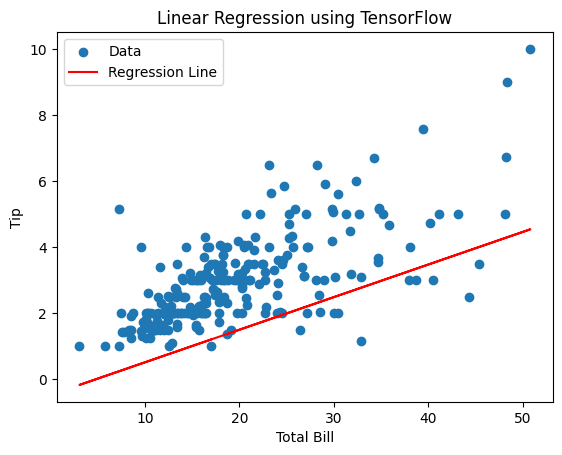

In [250]:
plt.scatter(x, y, label='Data')
plt.plot(x, pred, color='red', label='Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.title('Linear Regression using TensorFlow')
plt.show()


In [63]:
w = tf.Variable(tf.random.normal(shape=(1,1), dtype=tf.float32, name="weights"))
b = tf.Variable(tf.random.normal(shape=(1,), dtype=tf.float32, name="bias"))

learning_rate = 0.01
opt = tf.optimizers.Adam(learning_rate=learning_rate)

def cust_rmse(ypred, ytrue):
    loss = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(ytrue, ypred))))
    return loss

def train_step(X, y):
    with tf.GradientTape() as g:
        g.watch(w)
        g.watch(b)
        ypred = tf.add(tf.matmul(X, w),  b)
        loss = cust_rmse(ypred, y)
    gradient = g.gradient(loss, [w, b])
    #print(gradient)
    opt.apply_gradients(zip(gradient, [w, b]))
    return loss

epochs = 1000

prev_loss = tf.constant(np.inf)
for i in  range(epochs):

    loss  = train_step(X, y)
    if np.round(prev_loss, 5) == np.round(loss, 5):
        break
    
    if prev_loss > loss:
        prev_loss = loss
    
    #breaking early when no improvemnt in loss
    
    if i%20 == 0:
        print(f"epoch: {i}, loss: {loss}")

epoch: 0, loss: 46.60200500488281
epoch: 20, loss: 42.98338317871094
epoch: 40, loss: 39.55813217163086
epoch: 60, loss: 36.36286544799805
epoch: 80, loss: 33.40010070800781
epoch: 100, loss: 30.649944305419922
epoch: 120, loss: 28.08989143371582
epoch: 140, loss: 25.715682983398438
epoch: 160, loss: 23.548818588256836
epoch: 180, loss: 21.627723693847656
epoch: 200, loss: 19.99310302734375
epoch: 220, loss: 18.67412757873535
epoch: 240, loss: 17.67603302001953
epoch: 260, loss: 16.973161697387695
epoch: 280, loss: 16.513492584228516
epoch: 300, loss: 16.233287811279297
epoch: 320, loss: 16.072887420654297
epoch: 340, loss: 15.985933303833008
epoch: 360, loss: 15.940960884094238
epoch: 380, loss: 15.918651580810547
epoch: 400, loss: 15.907997131347656
epoch: 420, loss: 15.90308952331543
epoch: 440, loss: 15.900907516479492
epoch: 460, loss: 15.899970054626465
epoch: 480, loss: 15.899581909179688


In [64]:
ypred = tf.matmul(X,w) +b
ypred = ypred.numpy().reshape(1, -1)[0]

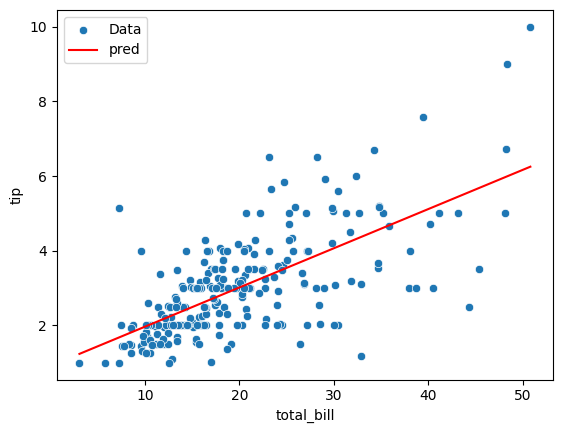

In [65]:
sns.scatterplot(x=df["total_bill"], y=df["tip"], label="Data")
sns.lineplot(x=df["total_bill"], y=ypred, color="red", label="pred")
plt.show()